<a href="https://colab.research.google.com/github/alysolamon/Applied-Statistics-For-Business/blob/main/Week%201%20-%20Types%20of%20Data%20Measurement%20Scale%20%26%20Graphical%20Displays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 — Types of Data, Measurement Scales & Graphical Displays

What I'm trying to do here is set up a **playground** where I can practice identifying data types and creating the right visual summaries:
- **Data types & measurement scales** → qualitative vs quantitative, nominal vs ordinal vs interval vs ratio
- **Qualitative data graphs** → bar charts, pie charts, Pareto charts, time series/line graphs
- **Quantitative data graphs** → stem-and-leaf plots, frequency distributions, histograms, polygons, ogives

**Quick self-reminder:** I'm not trying to memorize definitions only — I want to look at a dataset and know:
- What *kind* of data am I dealing with?
- What's the **best** way to visualize it?
- What does the graph actually *tell* me about the data?

## Notes before I start (why `pandas` + `numpy` + `matplotlib` + `seaborn`)

I *think* the combo here is basically:
- **pandas**: good for tables with labels/columns (keeps me organized)
- **NumPy**: good for the actual calculations (arrays + stats functions)
- **matplotlib**: the foundation for plotting in Python
- **seaborn**: makes prettier statistical plots with less code

**if I were to describe them in one sentence:**

> **pandas** is like the labeled spreadsheet layer

> **numpy** is like the math engine underneath

> **matplotlib** is like the canvas I draw on

> **seaborn** is like the fancy brush that makes things look good

### My Take on this Tech-Stack
It's quite un-orthodox compared to an Excel sheet, but it's really very fun to interact with because you can literally manipulate data at scale and convert it into any type of visualization you want. The data will bend to your will. But to be honest, it is quite confusing in the beginning. But when you look at how it bends everything to your will, it does work.

In [2]:
# Core libraries for data handling
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical functions
from scipy import stats

# Set plotting style (makes graphs look nicer)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## Helper functions (so I don't repeat myself)

I'm writing small helper functions so I can reuse the same logic across all questions.

### What these functions do:
- `classify_data()`: helps me identify if data is qualitative/quantitative and the measurement scale
- `make_frequency_table()`: creates a frequency distribution table
- `make_relative_frequency()`: converts counts to percentages
- `make_cumulative_frequency()`: for ogives
- `stem_and_leaf()`: creates a stem-and-leaf display
- `pareto_data()`: prepares data sorted for Pareto chart

In [ ]:
def classify_data(data, description=""):
    """
    Interactive helper to classify data types.
    This gives me a structure to think through the classification.
    """
    print(f"\n{'='*50}")
    print(f"Analyzing: {description}")
    print(f"{'='*50}")
    print(f"Data sample (first 5 values): {list(data)[:5]}")
    print(f"Data type: {type(data[0]) if len(data) > 0 else 'empty'}")
    print(f"\nClassification questions to ask myself:")
    print(f"  1. Are the values words/categories or numbers?")
    print(f"     - Words/categories → Qualitative")
    print(f"     - Numbers → Quantitative")
    print(f"  2. If numbers: do they have a true zero? Can I meaningfully multiply?")
    print(f"     - Yes → Ratio")
    print(f"     - No zero / can't multiply → Interval")
    print(f"  3. If categories: is there a natural order?")
    print(f"     - Yes → Ordinal")
    print(f"     - No → Nominal")
    print(f"{'='*50}\n")

def make_frequency_table(data, sort_by_index=False):
    """
    Creates a frequency distribution table from raw data.
    Returns a DataFrame with value, frequency, relative frequency, and %.
    """
    if isinstance(data, pd.Series):
        counts = data.value_counts().sort_index() if sort_by_index else data.value_counts()
    else:
        unique, counts = np.unique(data, return_counts=True)
        counts = pd.Series(counts, index=unique)

    df = pd.DataFrame({
        'Value': counts.index,
        'Frequency': counts.values,
        'Relative Frequency': counts.values / counts.sum(),
        'Percentage': (counts.values / counts.sum()) * 100
    })

    return df

def make_cumulative_frequency(freq_table):
    """
    Adds cumulative frequency columns to a frequency table.
    For ogives!
    """
    df = freq_table.copy()
    df['Cumulative Frequency'] = df['Frequency'].cumsum()
    df['Cumulative %'] = df['Percentage'].cumsum()
    return df

def stem_and_leaf(data, leaf_digits=1):
    """
    Creates a stem-and-leaf display.
    leaf_digits: how many digits per leaf (usually 1)
    """
    data = np.sort(np.asarray(data, dtype=float))

    # Split into stem and leaf
    divider = 10 ** leaf_digits
    stems = np.floor(data / divider).astype(int)
    leaves = np.round(data % divider).astype(int)

    # Group leaves by stem
    result = {}
    for stem, leaf in zip(stems, leaves):
        if stem not in result:
            result[stem] = []
        result[stem].append(int(leaf))

    # Print the display
    print("\nStem-and-Leaf Display:")
    print("  Stem | Leaf")
    print("  ------" + "-" * (len(str(max(result.keys()))) * 2))
    for stem in sorted(result.keys()):
        leaf_str = " ".join(str(l) for l in result[stem])
        print(f"  {stem:>5} | {leaf_str}")
    print()

    return result

def histogram_data(data, num_bins=None):
    """
    Returns histogram bin information without plotting.
    Use this to understand what bins would be created.
    """
    data = np.asarray(data, dtype=float)

    if num_bins is None:
        num_bins = int(np.sqrt(len(data)))  # Square root rule

    counts, bin_edges = np.histogram(data, bins=num_bins)

    df = pd.DataFrame({
        'Bin': list(range(len(counts))),
        'Lower Bound': bin_edges[:-1],
        'Upper Bound': bin_edges[1:],
        'Frequency': counts,
        'Midpoint': (bin_edges[:-1] + bin_edges[1:]) / 2
    })

    return df

def pareto_data(categories, values):
    """
    Prepares data for a Pareto chart (sorted by frequency descending).
    Returns DataFrame with categories sorted and cumulative percentage added.
    """
    df = pd.DataFrame({'Category': categories, 'Value': values})
    df = df.sort_values('Value', ascending=False).reset_index(drop=True)
    df['Cumulative %'] = (df['Value'].cumsum() / df['Value'].sum()) * 100
    return df

def time_series_setup(dates, values):
    """
    Sets up time series data for line graph plotting.
    """
    df = pd.DataFrame({'Date': pd.to_datetime(dates), 'Value': values})
    df = df.sort_values('Date').reset_index(drop=True)
    return df

print("Helper functions loaded!")

---

# Topics + Learning Objectives (What Week 1 Wants From Me)

When I read the module outline, it *sounds like* the point is:

## 1. Data Types & Measurement Scales
- **Qualitative (Categorical)**: words, labels, categories
  - **Nominal**: no natural order (e.g., color, gender)
  - **Ordinal**: natural order exists (e.g., rating scales)
- **Quantitative (Numeric)**: measurable quantities
  - **Interval**: no true zero, differences meaningful (e.g., temperature in °C)
  - **Ratio**: true zero exists, ratios meaningful (e.g., income, weight)

## 2. Graphical Displays for Qualitative Data
- **Bar chart**: bars for each category, height = frequency
- **Pie chart**: circle split into slices, shows proportions
- **Pareto chart**: bar chart sorted by frequency + cumulative line
- **Time series / Line graph**: shows change over time

## 3. Graphical Displays for Quantitative Data
- **Stem-and-leaf**: shows individual values while organizing them
- **Frequency distribution**: table of intervals and counts
- **Histogram**: bar chart of grouped quantitative data
- **Polygon**: line connecting midpoints of histogram bars
- **Ogive**: cumulative frequency curve

### Mini-checks I want to remember to ask myself
- Is this data categorical or numeric?
- If categorical → bar chart or pie chart?
- If numeric → histogram or stem-and-leaf?
- Am I comparing categories or showing a distribution?
- Is there a time component? (use line graph)

### My own summary (fill in as I learn)
- Nominal vs Ordinal — the key difference:

- Interval vs Ratio — the key difference:

- When to use a bar chart vs histogram:

- What a Pareto chart tells me that a regular bar chart doesn't:

---

# Question 1 — Identifying Data Types

**My task here:** Classify each variable by its data type (qualitative/quantitative) and measurement scale.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My thinking process (before calculating)
- What am I looking at?
- Are these numbers or categories?
- Can I do math on them (add, subtract, multiply)?

**My guess:**


### Use the helper to explore
```python
# Add data here and run classify_data to help think through it
# data = [...]
# classify_data(data, description="My data for Q1")
```

### My final answer
- Data type:
- Measurement scale:
- Why:

In [ ]:
# Workspace for Question 1
# Add your data and use the helper functions here


---

# Question 2 — Frequency Distribution Table

**My task here:** Create a frequency distribution table from raw data.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My thinking process
- What are the unique values/categories?
- How many times does each appear?
- Do I need relative frequency (proportions) or just counts?

### Use the helper
```python
# data = [...]
# freq_table = make_frequency_table(data)
# freq_table
```

### What the table tells me

In [ ]:
# Workspace for Question 2


---

# Question 3 — Bar Chart

**My task here:** Create and interpret a bar chart for categorical data.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My thinking process
- What are my categories?
- What does bar height represent?
- What pattern do I expect to see?

**My guess:**


### Use the helper
```python
# Create the bar chart
# categories = [...]
# values = [...]
#
# plt.bar(categories, values)
# plt.xlabel('...')
# plt.ylabel('...')
# plt.title('...')
# plt.show()
```

### What I see in the chart

In [ ]:
# Workspace for Question 3


---

# Question 4 — Pie Chart

**My task here:** Create a pie chart and interpret proportions.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My thinking process
- What's the "whole" (100%)?
- Which slice is biggest/smallest?
- When is a pie chart better than a bar chart?

**My guess:**


### Use the helper
```python
# Create the pie chart
# labels = [...]
# sizes = [...]
#
# plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# plt.title('...')
# plt.show()
```

### Interpretation

In [ ]:
# Workspace for Question 4


---

# Question 5 — Pareto Chart

**My task here:** Create a Pareto chart (sorted bar chart + cumulative line).

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My thinking process
- Pareto principle: ~80% of effects come from ~20% of causes
- Categories need to be sorted by frequency (highest first)
- The cumulative line shows running total

**What I expect to see:**


### Use the helper
```python
# Prepare Pareto data
# categories = [...]
# values = [...]
# pareto_df = pareto_data(categories, values)
# pareto_df
```

### What does the 80/20 analysis show?

In [ ]:
# Workspace for Question 5


---

# Question 6 — Time Series / Line Graph

**My task here:** Create a line graph showing change over time.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My thinking process
- What's the time period?
- Is the trend going up, down, or staying flat?
- Are there any patterns (seasonal, sudden changes)?

**My guess about the trend:**


### Use the helper
```python
# dates = [...]
# values = [...]
# ts_df = time_series_setup(dates, values)
#
# plt.plot(ts_df['Date'], ts_df['Value'], marker='o')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.title('...')
# plt.show()
```

### What the trend tells me

In [ ]:
# Workspace for Question 6


---

# Question 7 — Stem-and-Leaf Plot

**My task here:** Create a stem-and-leaf display for quantitative data.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My thinking process
- What's the stem? (usually the first digit(s))
- What's the leaf? (usually the last digit)
- What shape does the distribution have?

**What shape I expect:**


### Use the helper
```python
# data = [...]
# stem_and_leaf(data, leaf_digits=1)
```

### What I see in the distribution

In [ ]:
# Workspace for Question 7


---

# Question 8 — Frequency Distribution (Grouped Data)

**My task here:** Create a grouped frequency distribution for quantitative data.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My thinking process
- What's the range of my data?
- How many bins should I use? (Sturges' rule: ~1 + 3.3*log(n))
- What's the bin width?

**My plan for bins:**


### Use the helper
```python
# data = [...]
# hist_info = histogram_data(data, num_bins=...)
# hist_info
```

### What the grouped distribution shows

In [ ]:
# Workspace for Question 8


---

# Question 9 — Histogram

**My task here:** Create and interpret a histogram.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My thinking process
- What does the x-axis represent?
- What does the height of each bar mean?
- Is the distribution symmetric, skewed left, or skewed right?

**What shape I expect:**


### Use the helper
```python
# data = [...]
# plt.hist(data, bins=..., edgecolor='black')
# plt.xlabel('...')
# plt.ylabel('Frequency')
# plt.title('Histogram of...')
# plt.show()
```

### Shape interpretation
- Symmetric? Yes / No
- Skewed: Left / Right / Not skewed
- What this shape means for this data:

In [ ]:
# Workspace for Question 9


---

# Question 10 — Frequency Polygon

**My task here:** Create a frequency polygon (line graph of midpoints).

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My thinking process
- A polygon connects the MIDPOINTS of histogram bars
- It shows the same shape but as a line instead of bars
- Easier to compare multiple distributions on the same graph

**Why use a polygon instead of histogram:**


### Use the helper
```python
# First get histogram data
# hist_info = histogram_data(data, num_bins=...)
#
# Then plot the polygon
# plt.plot(hist_info['Midpoint'], hist_info['Frequency'], marker='o')
# plt.xlabel('...')
# plt.ylabel('Frequency')
# plt.title('Frequency Polygon')
# plt.grid(True)
# plt.show()
```

### What the polygon shows me

In [ ]:
# Workspace for Question 10


---

# Question 11 — Relative Frequency Distribution

**My task here:** Construct a relative frequency distribution for births by day of the week.

### The Question

The following data shows the number of natural births that occurred on each day of the week:

| Day | Frequency |
|-----|----------|
| Monday | 54 |
| Tuesday | 64 |
| Wednesday | 70 |
| Thursday | 59 |
| Friday | 57 |
| Saturday | 44 |
| Sunday | 52 |

**Tasks:**
1. Construct the relative frequency distribution
2. Does it appear that births occur on days of the week with equal frequency?

### My thinking process (before calculating)
- What is relative frequency? (hint: frequency divided by what?)
- What's the total number of births across all days?
- For each day: (day frequency / total frequency) × 100%
- To check if equal: compare the relative frequencies - should they all be around the same % if equal?

**My hypothesis:**
- If births were equally distributed across 7 days, each day would have about 14.2857142857%
- Looking at the raw frequencies, which days seem higher/lower?

**Step-by-step plan:**
1. Calculate the total (sum of all frequencies)
2. For each day, calculate relative frequency as: (day_count / total) × 100
3. Create a table with Day | Frequency | Relative Frequency
4. Compare the relative frequencies to the expected equal distribution (~14.29% for 7 days)

### My interpretation
- **Total births:** ______
- **Expected % per day if equal (100% / 7 days):** ______%
- **Which day(s) have the highest relative frequency?** ______
- **Which day(s) have the lowest relative frequency?** ______
- **Do births appear to occur with equal frequency?**
  - Yes / No
  - **Evidence:** What do I see in the relative frequencies that supports my answer?
    -
    -

### Extension: Visualizing the distribution
```python
# Create a bar chart to visualize the relative frequencies
# This helps see the pattern visually
# plt.figure(figsize=(10, 6))
# plt.bar(df['Day'], df['Relative Frequency (%)'], color='steelblue', edgecolor='black')
# plt.axhline(y=14.29, color='red', linestyle='--', label='Expected if equal (100%/7)')
# plt.xlabel('Day of the Week')
# plt.ylabel('Relative Frequency (%)')
# plt.title('Distribution of Natural Births by Day of the Week')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()
```

### What the bar chart shows
- Are there any obvious patterns or outliers?
- How much variation exists from the expected equal distribution?
- What might explain any patterns I see?

In [4]:
# Workspace for Question 11
# Days of the week (maintain order: Monday through Sunday)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Frequencies for each day
frequencies = [54, 64, 70, 59, 57, 44, 52]

# Create DataFrame for easier manipulation
df = pd.DataFrame({'Day': days, 'Frequency': frequencies})
# Calculate total number of births
# total_births = df['Frequency'].sum()
total_births = df['Frequency'].sum()
# Calculate relative frequency for each day
# Formula: (day_frequency / total_births) * 100
# df['Relative Frequency (%)'] =
df['Relative Frequency (%)'] = (df['Frequency'] / total_births) * 100
# Display the complete table
df

,Day,Frequency,Relative Frequency (%)
0,Monday,54,13.50
1,Tuesday,64,16.00
2,Wednesday,70,17.50
3,Thursday,59,14.75
4,Friday,57,14.25
5,Saturday,44,11.00
6,Sunday,52,13.00


---

# Question 12 — Relative Frequency Distribution (Plane Crashes)

**My task here:** Construct relative frequency distribution for fatal plane crash causes.

### The Question

The following data shows the causes of fatal plane crashes:

| Cause | Frequency |
|-------|----------|
| Pilot error | 306 |
| Other human error | 56 |
| Weather | 460 |
| Mechanical problems | 650 |
| Sabotage | 549 |

**Tasks:**
1. Construct the relative frequency distribution
2. What is the most serious threat to aviation safety?

### My thinking process (before calculating)
- What data type is this? (qualitative/quantitative, nominal/ordinal/interval/ratio)
- What is relative frequency? Formula: ______
- What's the total number of crashes?
- For each cause: (cause frequency / total) × 100%
- To find most serious threat: look at which cause has the highest relative frequency

**My hypothesis:**
- Looking at raw frequencies, which cause appears most common? ______
- The most serious threat should be the one with the highest % (largest proportion of crashes)

**Step-by-step plan:**
1. Calculate total crashes (sum all frequencies)
2. For each cause, calculate relative frequency
3. Create a table with Cause | Frequency | Relative Frequency (%)
4. Identify the cause with highest relative frequency
5. This is the most serious threat

### Data setup
```python
# Causes of plane crashes
causes = ['Pilot error', 'Other human error', 'Weather', 'Mechanical problems', 'Sabotage']

# Frequencies for each cause
frequencies = [306, 56, 460, 650, 549]

# Create DataFrame for easier manipulation
# df = pd.DataFrame({'Cause': causes, 'Frequency': frequencies})

# Calculate total number of crashes
# total_crashes =

# Calculate relative frequency for each cause
# Formula: (cause_frequency / total_crashes) * 100
# df['Relative Frequency (%)'] =

# Display the complete table
# df
```

### My interpretation
- **Total crashes:** ______
- **Most serious threat (highest %):** ______
- **Relative frequency of most serious threat:** ______%
- **Is this what I expected based on raw numbers?**
  - Yes / No
  - **Why:**
- **What does this mean for aviation safety?**
  - Should focus on improving ______ to reduce crashes
  - What could be done to address this cause?

### Extension: Visualizing with a Bar Chart
```python
# Create bar chart to visualize the distribution
# Sort by relative frequency for better visualization
# df_sorted = df.sort_values('Relative Frequency (%)', ascending=True)
#
# plt.figure(figsize=(12, 6))
# plt.barh(df_sorted['Cause'], df_sorted['Relative Frequency (%)'], color='coral', edgecolor='black')
# plt.xlabel('Relative Frequency (%)')
# plt.ylabel('Cause')
# plt.title('Relative Frequency Distribution: Causes of Fatal Plane Crashes')
# plt.grid(True, alpha=0.3, axis='x')
# plt.show()
```

### What the bar chart shows
- Which cause clearly stands out as most dangerous?
- Are there any causes with relatively low frequency that still matter?
- How does the visual compare to my initial impression from raw numbers?

In [10]:
# Workspace for Question 12
# Causes of plane crashes
causes = ['Pilot error', 'Other human error', 'Weather', 'Mechanical problems', 'Sabotage']

# Frequencies for each cause
frequencies = [306, 56, 460, 650, 549]

# Create DataFrame for easier manipulation
df = pd.DataFrame({'Cause': causes, 'Frequency': frequencies})

# Calculate total number of crashes
total_crashes = df['Frequency'].sum()

# Calculate relative frequency for each cause
# Formula: (cause_frequency / total_crashes) * 100
df['Relative Frequency (%)'] = ((df['Frequency'] / total_crashes) * 100).round(1)

# Display the complete table
df

,Cause,Frequency,Relative Frequency (%)
0,Pilot error,306,15.1
1,Other human error,56,2.8
2,Weather,460,22.8
3,Mechanical problems,650,32.2
4,Sabotage,549,27.2


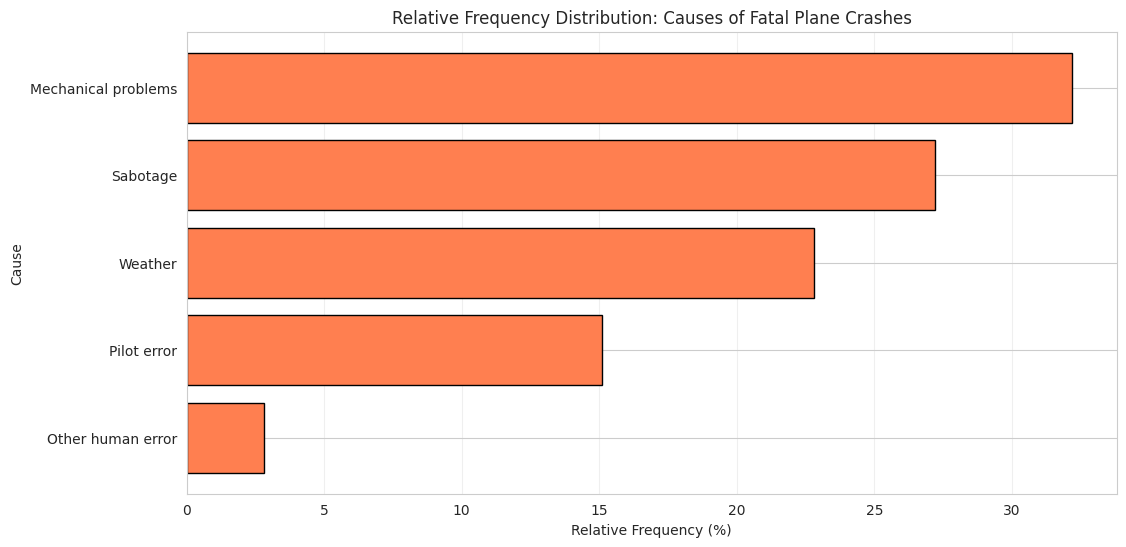

In [11]:
# Create bar chart to visualize the distribution
# Sort by relative frequency for better visualization
df_sorted = df.sort_values('Relative Frequency (%)', ascending=True)
#
plt.figure(figsize=(12, 6))
plt.barh(df_sorted['Cause'], df_sorted['Relative Frequency (%)'], color='coral', edgecolor='black')
plt.xlabel('Relative Frequency (%)')
plt.ylabel('Cause')
plt.title('Relative Frequency Distribution: Causes of Fatal Plane Crashes')
plt.grid(True, alpha=0.3, axis='x')
plt.show()


---

# Question 13 — Frequency Distribution (Wrestling Champions)

**My task here:** Create a frequency distribution from raw categorical data.

### The Question

The following data represents the college with the most wrestling champions from 1981-2005:

```
A  D  E  D  A,
C  B  D  A  A,
B  C  D  C  A,
E  B  E  C  E,
D  B  A  C  A
```

**Tasks:**
(a) Determine the frequency distribution
(b) Determine the relative frequency distribution
(c) Determine the percent frequency distribution
(d) Construct a bar chart for the data

### My thinking process (before calculating)
- What type of data is this? (letters representing colleges = qualitative, nominal)
- How many years of data? (25 years = 25 data points)
- For frequency distribution: count how many times each letter (A, B, C, D, E) appears
- For relative frequency: (count of each letter / 25 total)
- For percent frequency: relative frequency × 100
- Bar chart: x-axis = colleges (A-E), y-axis = frequency or percent

**My hypothesis:**
- Looking at the data, which college appears most often? ______
- Which appears least often? ______
- Are there roughly equal counts or is one dominant?

---

## Part (a) - Frequency Distribution

**Goal:** Count occurrences of each college letter (A, B, C, D, E)

```python
# Raw data from 1981-2005 (25 years)
data = ['A', 'D', 'E', 'D', 'A',
        'C', 'B', 'D', 'A', 'A',
        'B', 'C', 'D', 'C', 'A',
        'E', 'B', 'E', 'C', 'E',
        'D', 'B', 'A', 'C', 'A']

# Method 1: Use pandas value_counts() - easiest!
# freq_dist = pd.Series(data).value_counts().sort_index()
# print("Frequency Distribution:")
# print(freq_dist)

# Method 2: Manual counting (to understand the process)
# colleges = sorted(set(data))  # Get unique letters sorted: ['A', 'B', 'C', 'D', 'E']
# frequencies = [data.count(college) for college in colleges]
# freq_table = pd.DataFrame({'College': colleges, 'Frequency': frequencies})
# freq_table
```

**Results:**
- College A: ____ times
- College B: ____ times
- College C: ____ times
- College D: ____ times
- College E: ____ times
- Total: ____ (should equal 25)

---

## Part (b) - Relative Frequency Distribution

**Goal:** Convert frequencies to proportions (decimal form)

**Formula:** Relative Frequency = Frequency / Total (n)

```python
# Using the frequency table from part (a)
# freq_table['Relative Frequency'] =

# Display the table with relative frequencies
# freq_table
```

**Results:**
- College A: ____
- College B: ____
- College C: ____
- College D: ____
- College E: ____
- Sum of relative frequencies: ____ (should equal 1.0 or close to it)

---

## Part (c) - Percent Frequency Distribution

**Goal:** Convert relative frequencies to percentages

**Formula:** Percent Frequency = Relative Frequency × 100

```python
# Convert relative frequency to percent
# freq_table['Percent Frequency (%)'] =

# Display complete table
# freq_table
```

**Results:**
- College A: ____%
- College B: ____%
- College C: ____%
- College D: ____%
- College E: ____%
- Sum of percent frequencies: ____% (should equal 100% or close)

---

## Part (d) - Bar Chart Construction

**Goal:** Create a visual representation of the frequency distribution

```python
# Create bar chart
# plt.figure(figsize=(10, 6))
# plt.bar(freq_table['College'], freq_table['Frequency'], color='steelblue', edgecolor='black')
# plt.xlabel('College')
# plt.ylabel('Frequency')
# plt.title('Frequency Distribution: Wrestling Champions by College (1981-2005)')
# plt.grid(True, alpha=0.3, axis='y')
#
# Add value labels on top of bars
# for i, freq in enumerate(freq_table['Frequency']):
#     plt.text(i, freq + 0.1, str(freq), ha='center', va='bottom')
#
# plt.show()
```

**Alternative: Bar chart using percent frequencies**
```python
# plt.figure(figsize=(10, 6))
# plt.bar(freq_table['College'], freq_table['Percent Frequency (%)'],
#         color='lightcoral', edgecolor='black')
# plt.xlabel('College')
# plt.ylabel('Percent Frequency (%)')
# plt.title('Percent Frequency Distribution: Wrestling Champions by College (1981-2005)')
# plt.grid(True, alpha=0.3, axis='y')
# plt.ylim(0, 50)  # Adjust based on your data
# plt.show()
```

### What the bar chart tells me
- **Dominant college:** Which has the highest bar? ______
- **Least dominant:** Which has the lowest bar? ______
- **Distribution pattern:** Is one college clearly dominant, or are several competitive?
- **What this suggests about college wrestling programs:**
  -
  -
  -

### Summary of all parts
| College | Frequency | Relative Frequency | Percent Frequency |
|---------|-----------|-------------------|-------------------|
| A | | | |
| B | | | |
| C | | | |
| D | | | |
| E | | | |
| **Total** | | | |

Frequency, Relative Frequency, and Percent Frequency Distribution:


,College,Frequency,Relative Frequency,Percent Frequency (%)
0,A,7,0.28,28.0
1,B,4,0.16,16.0
2,C,5,0.20,20.0
3,D,5,0.20,20.0
4,E,4,0.16,16.0


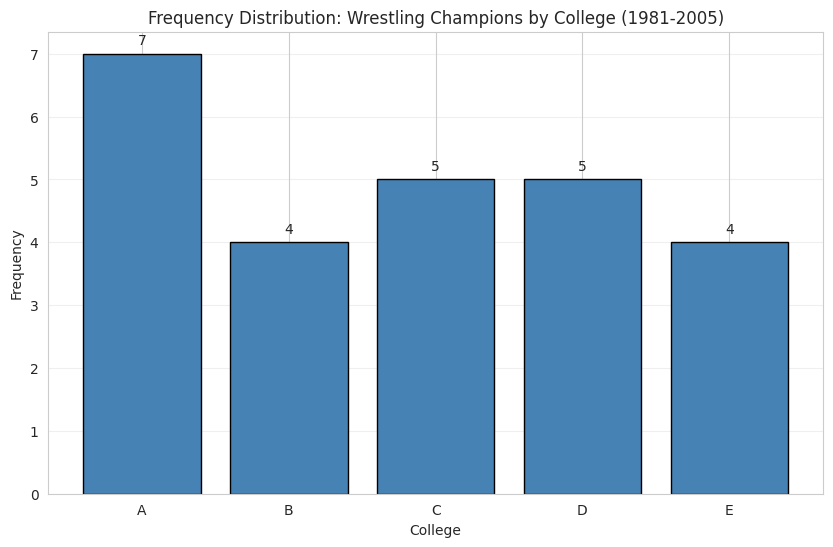

In [13]:
# Workspace for Question 13
# Raw data from 1981-2005 (25 years)
data = ['A', 'D', 'E', 'D', 'A',
        'C', 'B', 'D', 'A', 'A',
        'B', 'C', 'D', 'C', 'A',
        'E', 'B', 'E', 'C', 'E',
        'D', 'B', 'A', 'C', 'A']

# Part (a) - Frequency Distribution
# Using pandas value_counts() - easiest!
freq_series = pd.Series(data).value_counts().sort_index()

# Create a DataFrame from the series for easier manipulation
freq_table = pd.DataFrame({
    'College': freq_series.index,
    'Frequency': freq_series.values
})

# Part (b) - Relative Frequency Distribution

#so to get the RF we need to first the total of the FreQ
total_champions = freq_table['Frequency'].sum()

#We will take the FreQ total/sum then divide by the new total_champions
freq_table['Relative Frequency'] = freq_table['Frequency'] / total_champions

# Part (c) - Percent Frequency Distribution
freq_table['Percent Frequency (%)'] = freq_table['Relative Frequency'] * 100

print("Frequency, Relative Frequency, and Percent Frequency Distribution:")
display(freq_table)

# Part (d) - Bar Chart Construction
plt.figure(figsize=(10, 6))
plt.bar(freq_table['College'], freq_table['Frequency'], color='steelblue', edgecolor='black')
plt.xlabel('College')
plt.ylabel('Frequency')
plt.title('Frequency Distribution: Wrestling Champions by College (1981-2005)')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for i, freq in enumerate(freq_table['Frequency']):
    plt.text(i, freq + 0.1, str(freq), ha='center', va='bottom')

plt.show()

---

# Question 14 — Interpreting a Histogram

**My task here:** Read and interpret an existing histogram.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### What I see in the histogram
- What is the approximate center?
- What is the spread?
- What is the shape? (symmetric, skewed left, skewed right)
- Are there any outliers or unusual features?

**My interpretation:**
- Shape:
- Center:
- Spread:
- What this means for the data:

In [ ]:
# Workspace for Question 14


---

# Question 15 — Comparing Two Distributions

**My task here:** Compare two datasets using graphical methods.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My thinking process
- What am I comparing? (centers, spreads, shapes)
- Which graph helps me compare?
- Side-by-side histograms or overlapping polygons?

**What I expect to find:**


### Use the helper
```python
# data1 = [...]
# data2 = [...]
#
# Comparison approach here
```

### Comparison summary

In [ ]:
# Workspace for Question 15


---

# Question 16 — Real-World Data Interpretation

**My task here:** Apply graphical skills to a real dataset.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My approach
- What type of data is this?
- What question am I trying to answer?
- What graph will help me answer it?

**My plan:**

In [ ]:
# Workspace for Question 16


---

# Question 17 — Identifying Misleading Graphs

**My task here:** Spot problems in how data is displayed.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### What to look for
- Does the y-axis start at 0? (if not, can exaggerate differences)
- Are scales consistent?
- Is the area/length proportional to the value?
- Are labels clear and accurate?

**Issues I spot:**

In [ ]:
# Workspace for Question 17


---

# Question 18 — Constructing a Frequency Table from Raw Data

**My task here:** Take raw numbers and organize them into a proper frequency table.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My thinking process
- First, sort the data
- Find min, max, and range
- Decide on number of classes/bins
- Calculate class width
- Build the table

**My calculations:**
- Min:
- Max:
- Range:
- Number of classes:
- Class width:

In [ ]:
# Workspace for Question 18


---

# Question 19 — Percentiles and Quartiles from Graphs

**My task here:** Use an ogive or similar graph to find percentiles.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My thinking process
- Ogive shows cumulative %
- To find percentile: go up from percentile on y-axis, across to curve, down to x-axis
- Q1 = 25th percentile, Median = 50th, Q3 = 75th

**What I'm finding:**
- 25th percentile (Q1):
- 50th percentile (Median):
- 75th percentile (Q3):
- What percentile is value [X]?

In [ ]:
# Workspace for Question 19


---

# Question 20 — Comprehensive Analysis (All Graph Types)

**My task here:** Apply everything I've learned to one dataset.

### The Question (to be added)

*I'll paste the specific question here when working on it.*

### My comprehensive approach
1. **Classify the data**: What type is it?
2. **Choose appropriate displays**: Which graphs work?
3. **Create the displays**: Use my helper functions
4. **Interpret**: What does each graph reveal?
5. **Compare**: Do different graphs show different insights?

**Step 1 - Data classification:**

**Step 2 - Graph selection:**

**Step 3 - Interpretation summary:**

In [ ]:
# Workspace for Question 20


---

# Quick Reference — My Week 1 Cheat Sheet

| Data Type | Subtype | Examples | Appropriate Graphs |
|-----------|---------|----------|-------------------|
| Qualitative | Nominal | Color, gender, nationality | Bar chart, Pie chart |
| Qualitative | Ordinal | Rating scale, education level | Bar chart (ordered) |
| Quantitative | Interval | Temperature (°C/F), years | Histogram, Polygon |
| Quantitative | Ratio | Income, weight, height | Histogram, Stem-and-leaf, Ogive |

### Graph Selection Guide

| Goal | Best Graph |
|------|-----------|
| Show frequency of categories | Bar chart |
| Show proportions/percentages | Pie chart |
| Show "vital few" vs "trivial many" | Pareto chart |
| Show change over time | Line graph / Time series |
| Show distribution of quantitative data | Histogram |
| Show individual values in distribution | Stem-and-leaf |
| Show cumulative frequencies | Ogive |
| Compare two distributions | Overlapping polygons |

### Key Formulas/Reminders

**Sturges' Rule** (for number of bins):
$$k = 1 + 3.322 \times \log_{10}(n)$$

**Class Width** (approximately):
$$\text{width} = \frac{\text{range}}{\text{number of classes}}$$

**Relative Frequency**:
$$RF = \frac{f}{n}$$

**Cumulative Relative Frequency**:
$$CRF = \frac{\sum f}{n}$$